In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 生成测试数据集

In [2]:
# 定义数据集合
X = np.arange(0,10,0.1, dtype=np.float32)
Y = 2*X + 2*np.random.random(100)

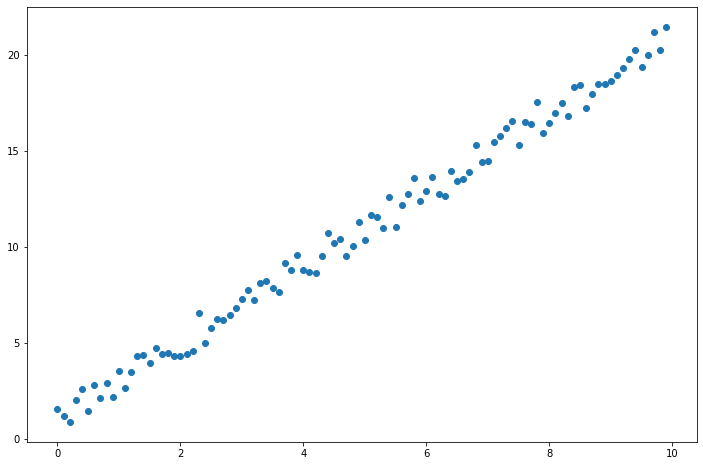

In [3]:
# 可视化数据集
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax.scatter(X,Y)

fig.show()

## 定义我们的模型

这里使用Pytorch中的模型

In [4]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear1 = nn.Linear(1, 1)

    def forward(self, x):
        x = self.linear1(x)
        return x

In [5]:
# 模型初始化
linearModel = LinearRegression()

## 定义损失函数

In [6]:
loss = torch.nn.MSELoss() # 定义均方损失函数

In [7]:
# 损失函数的例子
x_sample = torch.tensor([1,0], dtype=torch.float32)
y_sample = torch.tensor([1,1], dtype=torch.float32)

l = loss(x_sample, y_sample)
print(l)

tensor(0.5000)


## 定义优化器

我们在这里定义一个SGD优化器,     

```python
optimizer = torch.optim.SGD([w], lr=learning_rate)
```

其中:
- w表示我们要更新的参数(网络的权重)
- lr表示学习率

在Pytorch中, 还optimizer还提供可以一次更新全部的参数, 和参数梯度清零两个功能.

- ` optimizer.step()`: 对神经网络(复合函数)的相关变量进行更新, 即所有参数值向梯度相反方向走一步;
-  `optimizer.zero_grad()`: 对神经网络(复合函数)的相关系数进行梯度的清空;

In [8]:
# 定义一个SGD优化器
learning_rate = 0.001
optimizer = torch.optim.SGD(linearModel.parameters(), lr=learning_rate)

## 更新权重

In [9]:
X_tensor = torch.from_numpy(X).view(100,1)
Y_tensor = torch.from_numpy(Y).view(100,1)

n_iters = 101
for epoch in range(n_iters):
    y_pred = linearModel(X_tensor)
    l = loss(Y_tensor, y_pred) # 求误差(注意这里的顺序)
    l.backward() # 求梯度
    optimizer.step()  # 更新权重，即向梯度方向走一步
    optimizer.zero_grad() # 清空梯度

    [w, b] = linearModel.parameters()  # 获得参数
    if epoch % 20 == 0:
        print(f'epoch {epoch+1}: w = {w.data}, loss = {l.item():.3f}')

print(f'根据训练模型预测, 当x=5时, y的值为： {linearModel(torch.tensor([5.0]))}')

epoch 1: w = tensor([[0.8991]]), loss = 49.043
epoch 21: w = tensor([[1.7334]]), loss = 3.314
epoch 41: w = tensor([[1.9409]]), loss = 0.481
epoch 61: w = tensor([[1.9924]]), loss = 0.305
epoch 81: w = tensor([[2.0050]]), loss = 0.294
epoch 101: w = tensor([[2.0080]]), loss = 0.294
根据训练模型预测, 当x=5时, y的值为： tensor([10.9290], grad_fn=<AddBackward0>)


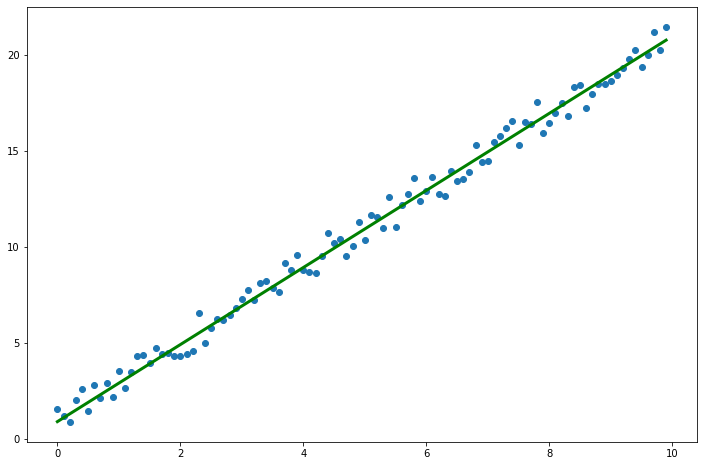

In [10]:
# 绘制预测曲线
y_pre = linearModel(X_tensor).detach().numpy()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

ax.scatter(X,Y)
ax.plot(X, y_pre, 'g-',  lw=3)

fig.show()